In [2]:
import pandas as pd
import numpy as np
#from plotnine import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
    
import statsmodels.api as sm

from scipy.stats import mode

import random
 
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_excel('C:\\Users\\i053131\\Desktop\\Epilepsie\\Dreem\\data\\interim\\featuresTrain.xlsx')

In [4]:
#training, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])
training, test  = train_test_split(df, test_size=0.2, random_state=42)
X = training.iloc[:,:-1]
y = training.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_true = test.iloc[:,-1]

In [5]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_true.shape)

(35064, 63)
(35064,)
(8766, 63)
(8766,)


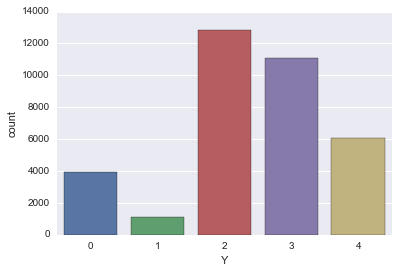

In [33]:
sns.countplot(x="Y", data=training)

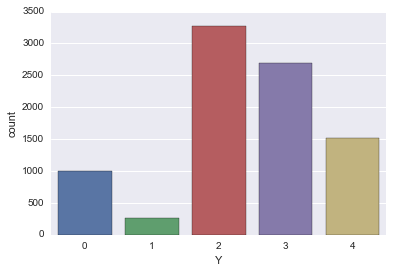

In [34]:
sns.countplot(x="Y", data=test)

In [6]:
def multi_svc(X, y, X_test, y_true):
    #Lkappa_l1 = []
    Lkappa_l2 = []
    Lkappa_poly = []
    Lrecall_l2 = []
    Lrecall_poly = []
    Lprecision_l2 = []
    Lprecision_poly = []
    L = [0.00000001,0.0000001, 0.000001, 0.00001, 0.0001, 0.01, 1, 100]
    for C in L: 
        l2_Lsvc = LinearSVC(C=C, penalty='l2', loss="hinge")
        poly_svc = SVC(C=C, kernel="poly", degree=2, coef0=1)
        l2_Lsvc.fit(X, y)
        poly_svc.fit(X, y)
        y_pred_l2 = l2_Lsvc.predict(X_test)
        y_pred_poly = poly_svc.predict(X_test)
        kappa_l2 = cohen_kappa_score(y_true, y_pred_l2)
        kappa_poly = cohen_kappa_score(y_true, y_pred_poly)
        Lrecall_l2.append(recall_score(y_true, y_pred_l2, average='micro', labels=[0, 1, 2, 3, 4]))
        Lrecall_poly.append(recall_score(y_true, y_pred_poly, average='micro', labels=[0, 1, 2, 3, 4]))
        Lprecision_l2.append(precision_score(y_true, y_pred_l2, average='micro', labels=[0, 1, 2, 3, 4]))
        Lprecision_poly.append(precision_score(y_true, y_pred_poly, average='micro', labels=[0, 1, 2, 3, 4]))
        Lkappa_l2.append(kappa_l2)
        Lkappa_poly.append(kappa_poly)
        
    ##########
    fig, ax = plt.subplots()
    ax.set_title("Precision (red) & recall (blue) vs C for l2")
    ax.semilogx(L, Lprecision_l2, color='r', label="Precision", linestyle="-")
    ax.semilogx(L, Lrecall_l2, color='b', label="Recall", linestyle="-")
    plt.legend()
    plt.show()
    fig, ax = plt.subplots()
    ax.set_title("Precision (red) & recall (blue) vs C for poly")
    ax.semilogx(L, Lprecision_poly, color='r', label="Precision", linestyle="-")
    ax.semilogx(L, Lrecall_poly, color='b', label="Recall", linestyle="-")
    plt.legend()
    plt.show()
               
    fig, ax = plt.subplots()
    ax.set_title("kappa vs C for l2")
    ax.semilogx(L, Lkappa_l2, color="r", label = "kappa l2", linestyle="-")
    ax.semilogx(L, Lkappa_poly, color = "b", label = "Kappa polynomial Kernel", linestyle="-")
    plt.legend()
    plt.show()
    return [Lkappa_l2, Lkappa_poly]

In [25]:
#wake_svc(X, y, X_test, y_true)

In [7]:
scaler = StandardScaler()
scaler.fit(X) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

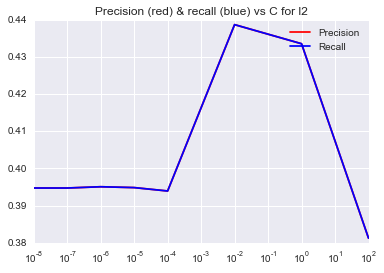

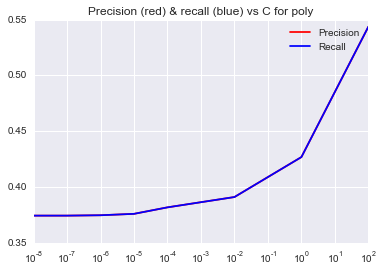

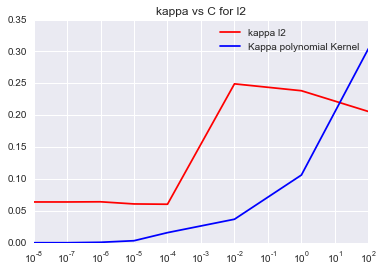

[[0.06391615890105284,
  0.06391615890105284,
  0.06420898609514025,
  0.06081753672638779,
  0.06035369452047612,
  0.2491281833602852,
  0.23835483217737485,
  0.20580100135975055],
 [0.0,
  0.0,
  0.0006894806660936448,
  0.0031452436685648344,
  0.015829348874228932,
  0.036833364611119856,
  0.10616002365708299,
  0.3042220886014301]]

In [42]:
multi_svc(X_scaled, y, X_test_scaled, y_true)

In [10]:
def multi_svc_rbf(X, y, X_test, y_true, gamma = [0.01, 0.1, 1, 5, 100], L = [0.0000001, 0.000001, 0.00001, 0.0001, 0.01, 1, 100]):
    for g in gamma:
        #print("gamma: " + str(g))
        Lkappa = []
        Lrecall = []
        Lprecision = []
        for C in L: 
            #print ("C: " + str(C))
            model_svc =SVC(kernel="rbf", gamma=g, C=C)
            model_svc.fit(X, y)
            y_pred = model_svc.predict(X_test)
            #Lrecall.append(recall_score(y_true, y_pred, average='micro', labels=[0, 1, 2, 3, 4]))
            #Lprecision.append(precision_score(y_true, y_pred, average='micro', labels=[0, 1, 2, 3, 4]))
            Lkappa.append(cohen_kappa_score(y_true, y_pred))
    ####
        #fig, ax = plt.subplots()
        #ax.set_title("Precision (red) & recall (blue) vs C with gamma =" + str(g))
        #ax.semilogx(L, Lprecision, color='r',label="Precision", linestyle="-")
        #ax.semilogx(L, Lrecall, color='b', label="Recall", linestyle="-")
        #plt.legend()
        #plt.show()
                   
        fig, ax = plt.subplots()
        ax.set_title("kappa vs C with gamma ="  + str(g))
        ax.semilogx(L, Lkappa)
        plt.show()
        
    return Lkappa

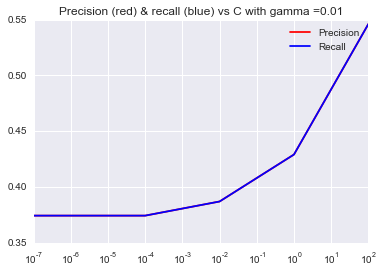

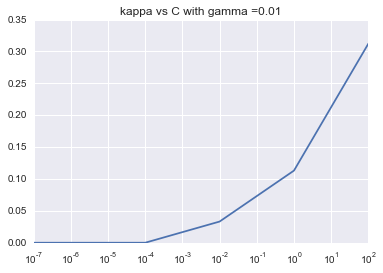

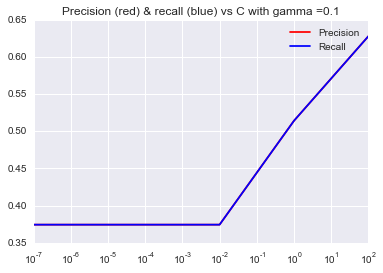

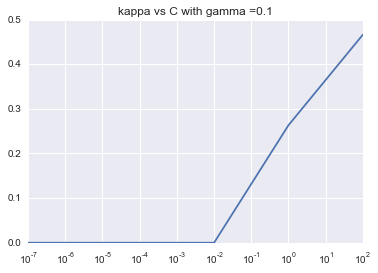

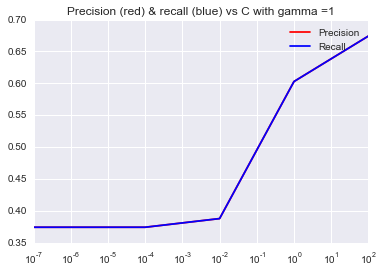

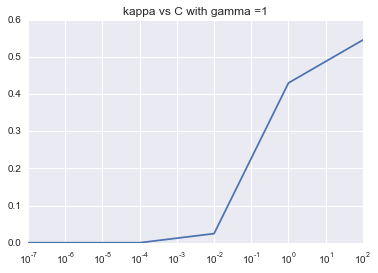

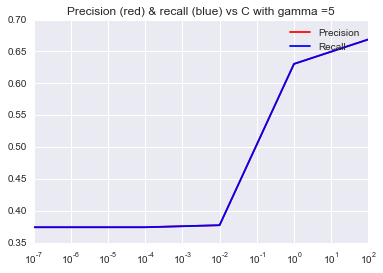

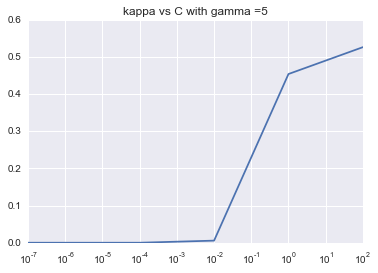

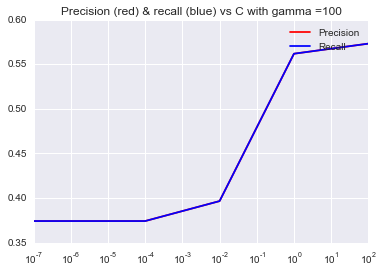

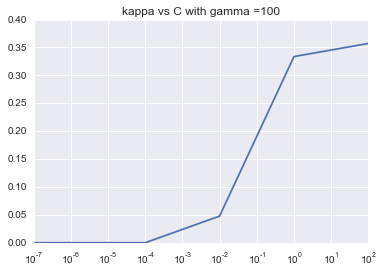

[0.0,
 0.0,
 0.0,
 0.0,
 0.047686953525370224,
 0.33360952711029623,
 0.3571609686380275]

In [52]:
multi_svc_rbf(X_scaled, y, X_test_scaled, y_true)

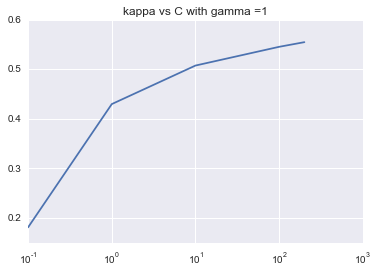

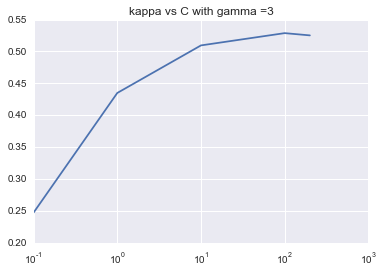

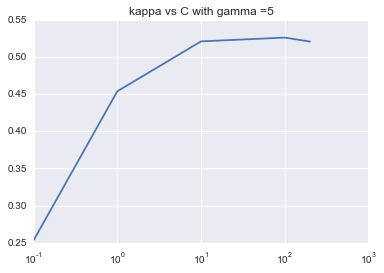

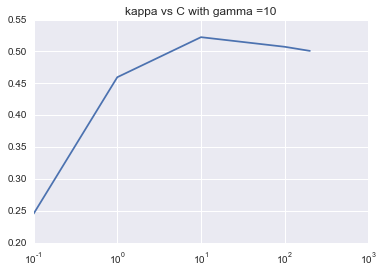

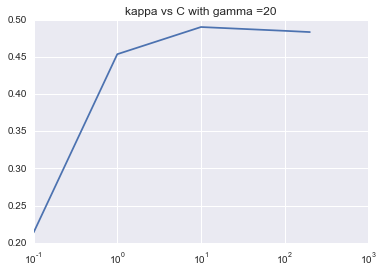

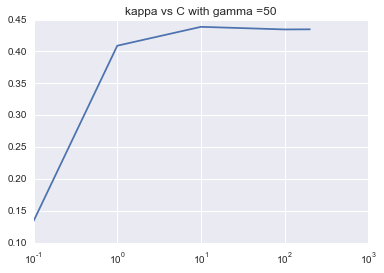

[0.13401480283659195,
 0.40896115445525516,
 0.4385417163286873,
 0.4344584051496495,
 0.43465167598370347]

In [54]:
multi_svc_rbf(X_scaled, y, X_test_scaled, y_true, [1,  3,  5,  10,  20, 50], [0.1, 1, 10, 100, 200])

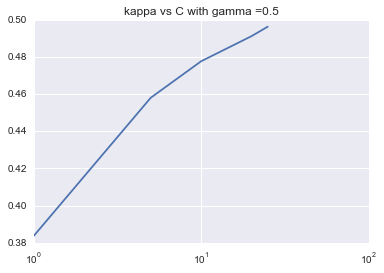

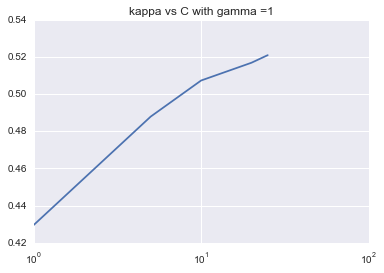

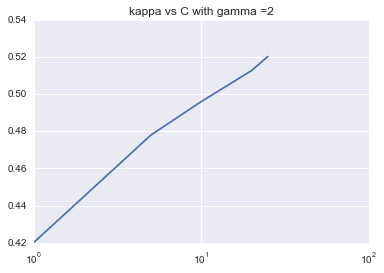

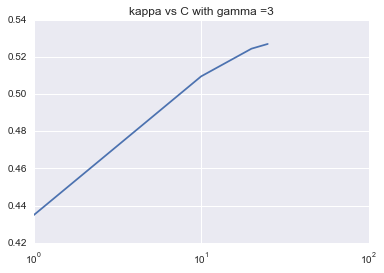

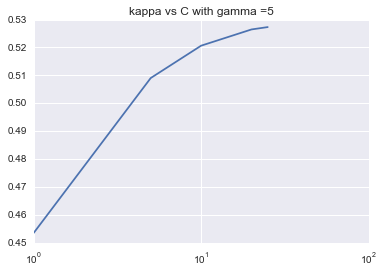

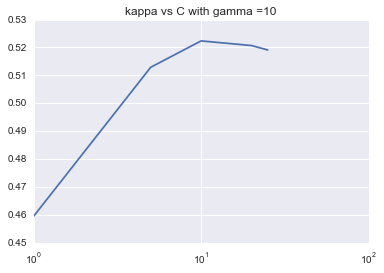

[0.45952728396465814,
 0.5128883702515159,
 0.5223415104815974,
 0.5206694895587417,
 0.5190949397690288]

In [11]:
multi_svc_rbf(X_scaled, y, X_test_scaled, y_true, [0.5,  1,  2,  3,  5, 10], [1, 5, 10, 20, 25])

In [31]:
X['min_eeg_1'].min()


-7052074.0

In [32]:
X['max_eeg_1'].max()

5545847.0

In [44]:
max([0.3317048196359236,
 0.3812949206990327,
 0.41578165126976785,
 0.4117546123349578,
 0.4114732733678562])

0.41578165126976785